# <center>Multiple Linear Regression</center>


#### About this Notebook
In this notebook, we learn how to use scikit-learn to implement Multiple linear regression.


**$$ \ y =  \beta_1 x_1 + \beta_2 x_2 + \beta_3  x_3 + \beta_0 \ $$**

 We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


$$ \ y =  \beta_1 x_1 + \beta_2 x_2 + \beta_3  x_3 + \beta_0 \ $$



In [4]:
df = pd.read_csv("Datasets/FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
Data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
Data.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


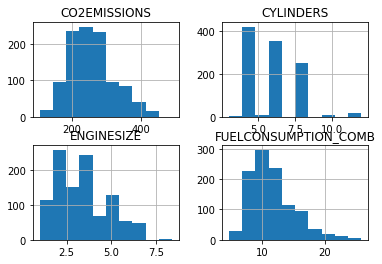

In [6]:
viz = Data[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

<img src='images/Dataset.png'/>

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.
<img src='images/SLR_TRAIN_TEST.png'/>

In [7]:
X = Data[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']]
X.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB
0,4,2.0,8.5
1,4,2.4,9.6
2,4,1.5,5.9
3,6,3.5,11.1
4,6,3.5,10.6


In [8]:
Y = Data[['CO2EMISSIONS']]
Y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [10]:
x_train.shape

(853, 3)

In [90]:
x_test.shape

(214, 3)

In [91]:
y_train.shape

(853, 1)

In [104]:
y_test.shape
y_test

,CO2EMISSIONS
611,193
377,283
577,225
536,283
426,258
...,...
714,225
125,317
557,280
260,159


In [93]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [94]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
regr.coef_

array([[ 7.43510544, 11.97835768,  9.1750448 ]])

In [96]:
regr.intercept_

array([66.98032559])

In [106]:
new_predict = regr.predict(x_test)
new_predict

array([[197.74783903],
       [268.76393269],
       [210.59290175],
       [306.39302316],
       [256.27571187],
       [303.23286837],
       [193.64446859],
       [212.42791071],
       [203.04904524],
       [180.46827514],
       [249.36902855],
       [192.03899148],
       [255.35820739],
       [261.78073875],
       [189.28647804],
       [227.10798239],
       [254.7210342 ],
       [203.25286591],
       [251.20403751],
       [252.68220456],
       [222.32804611],
       [321.06168805],
       [299.39842243],
       [175.72773151],
       [217.49958507],
       [187.93562104],
       [268.76393269],
       [289.79002511],
       [204.52721229],
       [317.2386489 ],
       [344.77519009],
       [306.69906562],
       [349.10809237],
       [257.47354764],
       [238.35897479],
       [205.57202683],
       [181.58960029],
       [251.05101628],
       [249.49633861],
       [310.21606231],
       [229.86049583],
       [178.96439691],
       [324.89613399],
       [255

In [98]:
regr.score(x_train,y_train)

0.8696334213617883

In [99]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [100]:
print("R2_Values",r2_score(y_test,new_predict))

R2_Values 0.836535676882139


In [101]:
print("Mean_Abolute_Error is:",mean_absolute_error(y_test,new_predict))

Mean_Abolute_Error is: 17.9091337568975


In [102]:
print("mean_squared_error is:",mean_squared_error(y_test,new_predict))

mean_squared_error is: 595.9137801768287


### Cross-validation 
● Model performance is dependent on way the data is split 

● Not representative of the model’s ability to generalize 

● Solution: Cross-validation

<img src='images/Cross_validation.png'/>

In [107]:
from sklearn.model_selection import cross_val_score 

In [113]:
cv_results = cross_val_score(regr, x_train, y_train, cv=20) 
cv_results

array([0.86167123, 0.83677353, 0.91345402, 0.89111084, 0.83187428,
       0.76833399, 0.83126732, 0.86479111, 0.85450899, 0.83769185,
       0.87960965, 0.90463403, 0.86248906, 0.92150331, 0.85616246,
       0.88287222, 0.83956867, 0.83875563, 0.89753204, 0.83436968])

In [114]:
np.mean(cv_results)

0.8604486960007158

In [115]:
np.max(cv_results)

0.9215033112331722

In [116]:
np.min(cv_results)

0.7683339882166851